## Analyzing revenues from prepaid plans for Telecom operator Megaline

<span style="color:blue">**Project description:**</span> In this project, we work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 

For that purpose, we are requied carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

### Table of Contents

* [Step 1](#step1) We open the datasets and study their general information; 
* [Step 2](#step2) We prepare the data for analysis by preprocessing it as necessary;
* [Step 3](#step3) We describe the customers' behavior based on their average monthly usages; 
* [Step 4](#step4) We test the following two hypotheses regarding the average revenues generated from the plans:
    * Hypothesis 1: The average revenues from users of Ultimate and Surf calling plans differ.
    * Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions.
* [Step 5](#step5) We close the report with our final conclusions. 

<span style="color:blue">**Importing libraries:**</span> We close the introduction by importing all code libraries and output style functions we will be using in our work. 

In [1]:
# Import libraries and define output style functions.

# Import the pandas library 
#      (url-> https://pandas.pydata.org/).
import pandas as pd

# Import the numpy library 
#      (url-> https://pandas.pydata.org/).
import numpy as np

# Import stats module from scipy  
#      (url-> https://https://www.scipy.org/).
from scipy import stats as st

# Import pyplot module from matplotlib 
#      (url-> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html).
import matplotlib.pyplot as plt

# Import Markdown and display modules from IPython.display library 
#      (url -> https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).
from IPython.display import Markdown, display
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


<a class="anchor" id="step1"></a> 
### Step 1. Open the data file and study the general information 

We are provided with the following $5$ dataset paths:
1. /datasets/megaline_calls.csv 
2. /datasets/megaline_internet.csv 
3. /datasets/megaline_messages.csv
4. /datasets/megaline_plans.csv  
5. /datasets/megaline_users.csv 

We are also handed the following information about the fields on these datasets:

<span style="color:green">**1. The users table (data on users):**</span>  
- <span style="color:blue">**user_id:**</span> unique user identifier
- <span style="color:blue">**first_name:**</span> user's name
- <span style="color:blue">**last_name:**</span> user's last name
- <span style="color:blue">**age:**</span> user's age (years)
- <span style="color:blue">**reg_date:**</span> subscription date (dd, mm, yy)
- <span style="color:blue">**churn_date:**</span> the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated)
- <span style="color:blue">**city:**</span> user's city of residence
- <span style="color:blue">**plan:**</span> calling plan name

<span style="color:green">**2. The calls table (data on calls):**</span>  
- <span style="color:blue">**id:**</span> unique call identifier
- <span style="color:blue">**call_date:**</span> call date
- <span style="color:blue">**duration:**</span> call duration (in minutes)
- <span style="color:blue">**user_id:**</span> the identifier of the user making the call

<span style="color:green">**3. The messages table (data on texts):**</span>  
- <span style="color:blue">**id:**</span> unique text message identifier
- <span style="color:blue">**message_date:**</span> text message date
- <span style="color:blue">**user_id:**</span>  the identifier of the user sending the text

<span style="color:green">**4. The internet table (data on web sessions):**</span>  
- <span style="color:blue">**id:**</span> unique session identifier
- <span style="color:blue">**mb_used:**</span> the volume of data spent during the session (in megabytes)
- <span style="color:blue">**session_date:**</span> web session date
- <span style="color:blue">**user_id:**</span> user identifier

<span style="color:green">**5. The plans table (data on the plans):**</span>  
- <span style="color:blue">**plan_name:**</span> calling plan name
- <span style="color:blue">**usd_monthly_fee:**</span> monthly charge in US dollars
- <span style="color:blue">**minutes_included:**</span> monthly minute allowance
- <span style="color:blue">**messages_included:**</span> monthly text allowance
- <span style="color:blue">**mb_per_month_included:**</span> data volume allowance (in megabytes)
- <span style="color:blue">**usd_per_minute:**</span> price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- <span style="color:blue">**usd_per_message:**</span> price per text after exceeding the package limits
- <span style="color:blue">**usd_per_gb:**</span> price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

<span style="color:green">**Description of Surf Plan:**</span> 
1. Montly charge: $ \$20 $ dollars
2. $500$ monthly minutes, $50$ texts, and $15$ GB of data
3. After exceeding the package limits:
    - $1$ minute: $3$ cents
    - $1$ text message: $3$ cents
    - $1$ GB of data: $ \$10 $

<span style="color:green">**Description of Ultimate Plan:**</span> 
1. Monthly charge: $ \$70 $
2. $3000$ monthly minutes, $1000$ text messages, and $30$ GB of data
3. After exceeding the package limits:
    - $1$ minute: $1$ cent
    - $1$ text message: $1$ cent
    - $1$ GB of data: $ \$7 $

❗<span style="color:red">**Important note:**</span> Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabyes.

Let us open the data file and explore the format in which information is stored.

In [2]:
# Read comma-separated values (csv) file into a pandas DataFrame object using pandas.read_csv() method.
# Use try...except to make sure the project runs both on local machine and platform.
try:    # paths on local machine.
    m_calls = pd.read_csv('megaline_calls.csv') 
    m_internet= pd.read_csv('megaline_internet.csv')
    m_messages = pd.read_csv('megaline_messages.csv') 
    m_plans = pd.read_csv('megaline_plans.csv') 
    m_users = pd.read_csv('megaline_users1.csv') 
except:    # paths on Practicum100 platform.
    m_calls = pd.read_csv('/datasets/megaline_calls.csv')   
    m_internet = pd.read_csv('/datasets/megaline_internet.csv')
    m_messages = pd.read_csv('/datasets/megaline_messages.csv')
    m_plans = pd.read_csv('/datasets/megaline_plans.csv')
    m_users = pd.read_csv('/datasets/megaline_users1.csv')

# Create a tuple from the dataframes.
data = (m_users, m_calls, m_messages, m_internet, m_plans) 
m_calls.name = 'calls'
m_internet.name = 'internet'
m_messages.name = 'messages'
m_plans.name = 'plans'
m_users.name = 'users'

# Print a concise summary of a DataFrame with pandas.DataFrame.info() method.
for df in data:
    printmd(df.name, color='green')
    df.info()
    print()


<span style='color:green'>users</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



<span style='color:green'>calls</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



<span style='color:green'>messages</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



<span style='color:green'>internet</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



<span style='color:green'>plans</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



From the printed tables, we can collect the following information on the sizes, memory usages, and data types of the datasets:

<span style="color:green">**1. users:**</span> We have 500 rows and 8 columns taking 31.4+ KB of memory space. The column names match the ones described by the company. Among these columns, we have
- $2$ columns of dtype 'int64': 'user_id' and 'age';
- $6$ columns of dtype 'object': 'first_name', 'last_name', 'age', 'city', 'tariff', 'reg_date', 'churn_date'.

<span style="color:green">**2. calls:**</span> We have 137735 rows and 4 columns taking 4.2+ MB of memory space. The column names match the ones described by the company. Among these columns, we have
- $1$ columns of dtype 'int64': 'user_id';
- $1$ columns of dtype 'float64': 'duration';
- $2$ columns of dtype 'object': 'id' and  'call_date'.

<span style="color:green">**3. messages:**</span> We have 76051 rows and 3 columns taking 1.7+ MB of memory space. The column names match the ones described by the company. Among these columns, we have
- $1$ columns of dtype 'int64': 'user_id';
- $2$ columns of dtype 'object': 'id' and  'message_date'.

<span style="color:green">**4. internet:**</span> We have 104825 rows and 4 columns taking 3.2+ MB of memory space. The column names match the ones described by the company. Among these columns, we have
- $1$ columns of dtype 'int64': 'user_id';
- $1$ columns of dtype 'float64': 'mb_used';
- $2$ columns of dtype 'object': 'id' and  'session_date'.


<span style="color:green">**5. plans:**</span> We have 2 rows and 8 columns taking 256.0+ bytes of memory space. The column names match the ones described by the company. Among these columns, we have
- $5$ columns of dtype 'int64': 'messages_included', 'minutes_included', 'mb_per_month_included', 'usd_monthly_pay', 'city', 'usd_per_gb';
- $2$ columns of dtype 'float64': 'usd_per_message' and 'usd_per_minute';
- $1$ columns of dtype 'object': 'plan_name'.

To get a first impression on the contents populating the datasets, let us display few of their entries.

In [3]:
# Display first and last five rows of the Dataframes. 
for df in data:
    display(df.head())
    display(df.tail())



,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From the displayed information and dataset tables, we make the following observations on the quality of raw data:
- Only the 'churn_date' column of the users dataset contains multiple null values. These are not, however, missing values to be filled. The information tells us that about $6.8\%$ of the customers in our sample have stopped using the services. So, it is natural that churn dates are observed only for these customers.  
- All date columns are stored as string objects. Thus, it is necessary to convert them to datetime objects.
- The tariffs provided to us in the project description matches those stored in the plans dataset.
- The 'id' columns in the datasets contain underscores. As a result, the data type of these columns are strings rather than integer numbers. Nevertheless, what is important is that the 'id' numbers for a given service be unique for a given customer. We will further investigate this in Step 2.

Let us next check for duplicated rows in our datasets.

In [4]:
# Check duplicates in the datasets
for df in data:
    printmd(df.name, color='green')
    print('The number of duplicates: ', df.loc[df.duplicated() == True].shape[0])
    print()  


<span style='color:green'>users</span>

The number of duplicates:  0



<span style='color:green'>calls</span>

The number of duplicates:  0



<span style='color:green'>messages</span>

The number of duplicates:  0



<span style='color:green'>internet</span>

The number of duplicates:  0



<span style='color:green'>plans</span>

The number of duplicates:  0



We didn't find any duplicates, so no need to drop any rows from the datasets.

**Concluding remarks:** In this step, we loaded the datasets into our workspace and obtained some general information about their formats and contents. The biggest issue we found in overall data was that all date columns are stored as strings, rather than datetime objects. We found out that there are no unexpected missing values stored as NaN. This is not very surprising. Metadata on call, message, and internet usages are generated automatically and it is very important that they are accurate for billing purposes. So, we expect Telecom operators to have systems that store such information accurately and that are resilient to errors. The next section will take a closer look at the data in each column of the datasets that we will need during analysis. Unless we discover several anomalies in data in the next step, it seems that the raw data is already of good quality. 

<a class="anchor" id="step2"></a> 
### Step 2. Prepare the data

In this step, we will first convert the data to the necessary types. Then, we will look for errors in data and eliminate them. Finally, for each users, we will extract the following information:
- The number of calls made and minutes used per month;
- The number of text messages sent per month;
- The volume of data per month;

Note that we leave the monthly revenue computations of each user to Step 4. 

Let us start by converting the date columns from string to datetime objects.

In [5]:
# convert the date columns from string to datetime
for df in data:
    for col in df:
        if 'date' in col:
            print("Converting '{}' column from '{}' dataframe to datetime".format(col, df.name))
            df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce' )
            
# Print a concise summary of a DataFrame with pandas.DataFrame.info() method.
for df in data:
    printmd(df.name, color='green')
    df.info()
    print()            
            

Converting 'reg_date' column from 'users' dataframe to datetime
Converting 'churn_date' column from 'users' dataframe to datetime
Converting 'call_date' column from 'calls' dataframe to datetime
Converting 'message_date' column from 'messages' dataframe to datetime
Converting 'session_date' column from 'internet' dataframe to datetime


<span style='color:green'>users</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



<span style='color:green'>calls</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB



<span style='color:green'>messages</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB



<span style='color:green'>internet</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB



<span style='color:green'>plans</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



Let us check for errors in data, discuss how they can be remedied, and eliminate them accordingly. Recall that we found no errors in the plans dataset in Step 1. As mentioned, we also expect no errors in the calls, messages, and internet datasets. On the other hand, the users dataset might contain errors since its fields are generated manually. We also want consistency accross the 'user_id' columns of the datasets. So, we start by checking if the 'user_id' columns in the datasets uniquely identify the same $500$ customers.

In [6]:
# Check if 'user_id' column uniquley identifies the same customers and are consistent with each other
printmd(m_users.name, color='green')
display(m_users['user_id'].describe().to_frame().loc[['count', 'min', 'max']])


<span style='color:green'>users</span>

,user_id
count,500.0
min,1000.0
max,1499.0


We see that the $500$ customers are identified with integer ids in the range $[1000, 1499]$.

In [7]:
# Check the number of unique users in the dataframes.
missing_users = {'calls':[], 'messages':[], 'internet':[]}
for df in data:
    if 'user_id' in df.columns:
        printmd(df.name, color='green')
        print("Number of customers with unique user ids:", len(df['user_id'].unique()))
        if df.name != 'users':
            missing_users[df.name] = np.setdiff1d(np.array(m_users['user_id']), 
                                                  np.array(df['user_id'].unique()))
            print("User ids of customers who never used this service:", '({} customers)'
                  .format(len(missing_users[df.name])))
            print(missing_users[df.name])

print()
intersection_all = np.intersect1d(np.intersect1d(np.array(missing_users['calls']), 
                                                 np.array(missing_users['messages'])), 
                                  np.array(missing_users['internet']))
print('User ids of customers who never used any of the services:', '({} customers)'
                  .format(len(intersection_all)))
print(intersection_all)
            

<span style='color:green'>users</span>

Number of customers with unique user ids: 500


<span style='color:green'>calls</span>

Number of customers with unique user ids: 481
User ids of customers who never used this service: (19 customers)
[1025 1080 1089 1108 1121 1129 1131 1137 1143 1194 1204 1269 1275 1307
 1319 1349 1378 1463 1473]


<span style='color:green'>messages</span>

Number of customers with unique user ids: 402
User ids of customers who never used this service: (98 customers)
[1009 1010 1012 1021 1022 1024 1025 1040 1041 1042 1048 1049 1050 1063
 1068 1071 1073 1074 1085 1097 1106 1108 1109 1117 1129 1135 1143 1149
 1150 1152 1153 1156 1157 1158 1166 1171 1185 1202 1208 1210 1216 1217
 1225 1226 1233 1238 1239 1265 1269 1275 1277 1282 1284 1288 1292 1297
 1300 1306 1307 1310 1311 1317 1319 1321 1322 1325 1338 1353 1359 1360
 1367 1368 1378 1389 1390 1397 1400 1402 1403 1406 1411 1415 1418 1426
 1427 1436 1437 1449 1459 1461 1463 1473 1488 1490 1493 1495 1498 1499]


<span style='color:green'>internet</span>

Number of customers with unique user ids: 489
User ids of customers who never used this service: (11 customers)
[1025 1129 1143 1269 1275 1307 1319 1378 1463 1470 1473]

User ids of customers who never used any of the services: (10 customers)
[1025 1129 1143 1269 1275 1307 1319 1378 1463 1473]


We have identified that among the $500$ customers, some of them never used some or any of the services. In particular, there were almost $100$ customers who never sent any messages and $10$ customers did not use yet any of the services. Let us display the information of this latter group of customers.

In [8]:
display(m_users.loc[m_users['user_id'].isin(intersection_all)])

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT
319,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT
378,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT


Let us similarly check if the date data is consistent across the datasets.

In [9]:
# Check if date data is consistent across datasets
for df in data:
    for col in df:
        if 'date' in col:
            printmd(df.name, color='green')
            display(df[col].describe().to_frame())
            print()
            

<span style='color:green'>users</span>

,reg_date
count,500
unique,266
top,2018-07-12 00:00:00
freq,5
first,2018-01-01 00:00:00
last,2018-12-31 00:00:00


<span style='color:green'>users</span>

,churn_date
count,34
unique,29
top,2018-12-18 00:00:00
freq,3
first,2018-07-31 00:00:00
last,2018-12-31 00:00:00


<span style='color:green'>calls</span>

,call_date
count,137735
unique,351
top,2018-12-27 00:00:00
freq,1091
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


<span style='color:green'>messages</span>

,message_date
count,76051
unique,351
top,2018-12-28 00:00:00
freq,702
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


<span style='color:green'>internet</span>

,session_date
count,104825
unique,351
top,2018-12-24 00:00:00
freq,851
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


We observe the following partly overlapping time periods for our date data:
- The customers got registered to one of the plans in the year $2018$;  
- The churn data tells us the dates during the year $2018$ when some of the customers stopped using the plans.
- Data related to the calls, the text messages, and the internet sessions of the customers were collected from $15$-th of January 2018 until the end of the same year.

Based on our observations, it seems that we only need to check if the registration date and churn date, when available, of each customer are consistent with the dates of their calls, messages, and internet sessions. For this purpose, we add a 'month' column to the datasets to store the months corresponding to the dates. 

In [10]:
# Check if date data is consistent across datasets (con't)
# Add month of dates as new columns to the datasets
for df in data:
    for col in df:
        if 'date' in col:
            new_col = col.replace('date', '') + 'month'
            df[new_col] = df[col].dt.month

# Create a numeric list for the months (from 1 to 12)
month_list = [i for i in range(1, 13, 1)]


In [11]:
# Create a new DataFrame where rows are indexed by customers' 'user_id' and columns by the months
date_consistency = pd.DataFrame(index=list(range(1000, 1500, 1)), columns=month_list)
print(date_consistency)
# Create variables for counting
before_reg = 0
after_churn = 0

# Loop over the month and users to check if call, message, or internet data 
#      is available before the registration month or after churn date (when available)
for m in range(1, 13, 1):
    for i in list(range(500)):
        min_call_month = m_calls.loc[m_calls['user_id']==1000+i, 'call_date'].min().month
        max_call_month = m_calls.loc[m_calls['user_id']==1000+i, 'call_date'].max().month
        if (m_users.iloc[i, 5].month == m):
            date_consistency.iloc[i, (m-1)] = 1
            if (min_call_month < m):
                date_consistency.iloc[i, (min_call_month-1)] = 2
                before_reg += 1
        if (m_users.iloc[i, 7].month == m):
                date_consistency.iloc[i, (m-1)] = -1
                if (max_call_month > m):
                    date_consistency.iloc[i, (max_call_month-1)] = -2
                    after_churn += 1
                    
print(date_consistency)

# pd.set_option('display.max_rows', 500)
# Print the information
print('Number of users with call data before registration', before_reg)
print('Number of users with call data after churn', after_churn)


       1    2    3    4    5    6    7    8    9    10   11   12
1000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1001  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1002  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1003  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1004  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1495  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1496  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1497  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1498  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1499  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[500 rows x 12 columns]
       1    2    3    4    5    6    7    8    9    10   11   12
1000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1
1001  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1  NaN  NaN  NaN  NaN


While we found out that there were indeed no call, message, or internet session data for the users before the month they registered (as expected), we have $20$ customers for which such data is available after the months they are indicated to have churned. We believe that the inconsistency arises from the users dataset, because the information is manually generated by people. Perhaps, the churn date was stored as the date the customers informed the cancellation of their contracts. Thus, instead of dropping calls, messages, and internet sessions recorded after the churn dates from the datasets, we will correct the churn months of these $20$ customers by assigning to them the last months for which usage data is available. 

In [12]:
# Identify the customers' 'user_id' with problematic churn dates and get the correct churn month
problem_list = np.where(date_consistency == -2)
problematic_idx = list(date_consistency.iloc[problem_list[0]].index)
correct_months = [i+1 for i in list(problem_list[1])]

# print(problem_list)
# print(problematic_idx)<div class="alert alert-success" role="alert">
# print(correct_months)

# Correct churn month data for the problematic customers
m_users.loc[m_users['user_id'].isin(problematic_idx), 'churn_month'] = correct_months


As we know that the 'user_id' columns uniquely identify the customers, we can drop from the users dataset the columns providing information that is not relevant in the context of this study. Those are the 'first_name', 'last_name', and 'age' columns providing additional information on the customers. We also drop the 'churn_date' column, which was erroneous. In later analysis, we will only need 'churn_month' data.

In [13]:
# Drop customers' name and age data from the 'users' dataframe
m_users.drop(['first_name', 'last_name', 'age', 'churn_date'], axis = 1, inplace=True)

# Display info
m_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id        500 non-null int64
city           500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
reg_month      500 non-null int64
churn_month    34 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 23.6+ KB


In Step 1, we observed that the 'id' columns in the datasets contain underscores. As a result, the data type of these columns are strings rather than integer numbers. It is reasonable that the unique call, message, or session identifiers for each customer are denoted by appending the corresponding call, message, or session number to the 'user_id' identifier of that customer. So, the $5$-th call of customer $1000$ would be identified with the id $10005$. But, here we have the format $1000-5$. Therefore, either this is the data format used in Megaline's customer database. Or, while saving the data from the customers database to a csv file, the two numbers were joined with an underscore. 

If we are correct in our guess, the error could be remedied simply by removing the underscore from the strings populating the 'id' columns and converting the strings to integers. Even if we did not guess correctly how the data in the 'id' columns are generated, what really matters is that each data entry is unique (at least within every group for the respective user ids from the 'user_id' column). The 'calls', 'messages', and 'internet' datasets already have a column indicating the 'user_id' of each user, which we can always use to group data by the customers. So, let us first check if there are any duplicates in the 'id' columns before and after removing the underscores. If there are none, we will remove them and convert the data to integers for convenience. 

In [14]:
# Check if there are any duplicated strings in the id column are 
for df in data:
    for col in df:
        if col=='id':
            print("Number of duplicates in '{}' column from '{}' dataframe: {}".format(col, df.name, 
                                                                     (df[col].duplicated() == True).sum()))


Number of duplicates in 'id' column from 'calls' dataframe: 0
Number of duplicates in 'id' column from 'messages' dataframe: 0
Number of duplicates in 'id' column from 'internet' dataframe: 0


In [15]:
# Check if there are any duplicated integers in the id column after '_' are removed and strings are cast to integers
for df in data:
    for col in df:
        if col=='id':
            print("Number of duplicates in '{}' column from '{}' dataframe: {}".format(col, df.name, 
                                     (df[col].str.replace('_', '').astype('int').duplicated() == True).sum()))


Number of duplicates in 'id' column from 'calls' dataframe: 0
Number of duplicates in 'id' column from 'messages' dataframe: 0
Number of duplicates in 'id' column from 'internet' dataframe: 0


In [16]:
# Remove '_' from the strings populating the 'id' columns from the datasets and convert columns to integers
for df in data:
    for col in df:
        if col=='id':
            df[col] = df[col].str.replace('_', '').astype('int')
            
# Print a concise summary of a DataFrame with pandas.DataFrame.info() method.
for df in data:
    printmd(df.name, color='green')
    df.info()
    print()  
    

<span style='color:green'>users</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id        500 non-null int64
city           500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
reg_month      500 non-null int64
churn_month    34 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 23.6+ KB



<span style='color:green'>calls</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id            137735 non-null int64
user_id       137735 non-null int64
call_date     137735 non-null datetime64[ns]
duration      137735 non-null float64
call_month    137735 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.3 MB



<span style='color:green'>messages</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
id               76051 non-null int64
user_id          76051 non-null int64
message_date     76051 non-null datetime64[ns]
message_month    76051 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.3 MB



<span style='color:green'>internet</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id               104825 non-null int64
user_id          104825 non-null int64
session_date     104825 non-null datetime64[ns]
mb_used          104825 non-null float64
session_month    104825 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.0 MB



<span style='color:green'>plans</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



We can see now that data in the 'id' columns are stored as integers. Let us continue by printing the summary statistics for the columns of our datasets to see if anything doesn't make sense.

In [17]:
# Print summary statistics for the columns of the datasets
for df in data:
    if df.name != 'plans':
        printmd(df.name, color='green')
        for col in df:
            printmd(col, color='blue')
            display(df[col].describe().to_frame())


<span style='color:green'>users</span>

<span style='color:blue'>user_id</span>

,user_id
count,500.000000
mean,1249.500000
std,144.481833
min,1000.000000
25%,1124.750000
50%,1249.500000
75%,1374.250000
max,1499.000000


<span style='color:blue'>city</span>

,city
count,500
unique,73
top,"New York-Newark-Jersey City, NY-NJ-PA MSA"
freq,80


<span style='color:blue'>reg_date</span>

,reg_date
count,500
unique,266
top,2018-07-12 00:00:00
freq,5
first,2018-01-01 00:00:00
last,2018-12-31 00:00:00


<span style='color:blue'>tariff</span>

,tariff
count,500
unique,2
top,surf
freq,339


<span style='color:blue'>reg_month</span>

,reg_month
count,500.000000
mean,6.290000
std,3.438247
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000


<span style='color:blue'>churn_month</span>

,churn_month
count,34.000000
mean,11.911765
std,0.514496
min,9.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,12.000000


<span style='color:green'>calls</span>

<span style='color:blue'>id</span>

,id
count,1.377350e+05
mean,1.165150e+06
std,1.643471e+06
min,1.001000e+04
25%,1.499465e+05
50%,1.165104e+06
75%,1.333308e+06
max,1.465106e+07


<span style='color:blue'>user_id</span>

,user_id
count,137735.000000
mean,1247.658046
std,139.416268
min,1000.000000
25%,1128.000000
50%,1247.000000
75%,1365.000000
max,1499.000000


<span style='color:blue'>call_date</span>

,call_date
count,137735
unique,351
top,2018-12-27 00:00:00
freq,1091
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


<span style='color:blue'>duration</span>

,duration
count,137735.000000
mean,6.745927
std,5.839241
min,0.000000
25%,1.290000
50%,5.980000
75%,10.690000
max,37.600000


<span style='color:blue'>call_month</span>

,call_month
count,137735.000000
mean,9.320797
std,2.412550
min,1.000000
25%,8.000000
50%,10.000000
75%,11.000000
max,12.000000


<span style='color:green'>messages</span>

<span style='color:blue'>id</span>

,id
count,7.605100e+04
mean,1.087230e+06
std,1.685300e+06
min,1.001100e+04
25%,1.347735e+05
50%,1.120507e+06
75%,1.328548e+06
max,1.470106e+07


<span style='color:blue'>user_id</span>

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


<span style='color:blue'>message_date</span>

,message_date
count,76051
unique,351
top,2018-12-28 00:00:00
freq,702
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


<span style='color:blue'>message_month</span>

,message_month
count,76051.000000
mean,9.584016
std,2.276392
min,1.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,12.000000


<span style='color:green'>internet</span>

<span style='color:blue'>id</span>

,id
count,1.048250e+05
mean,8.700316e+05
std,5.403356e+05
min,1.001000e+04
25%,1.373880e+05
50%,1.122233e+06
75%,1.293618e+06
max,1.499219e+06


<span style='color:blue'>user_id</span>

,user_id
count,104825.000000
mean,1242.496361
std,142.053913
min,1000.000000
25%,1122.000000
50%,1236.000000
75%,1367.000000
max,1499.000000


<span style='color:blue'>session_date</span>

,session_date
count,104825
unique,351
top,2018-12-24 00:00:00
freq,851
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


<span style='color:blue'>mb_used</span>

,mb_used
count,104825.000000
mean,366.713701
std,277.170542
min,0.000000
25%,136.080000
50%,343.980000
75%,554.610000
max,1693.470000


<span style='color:blue'>session_month</span>

,session_month
count,104825.000000
mean,9.342552
std,2.400404
min,1.000000
25%,8.000000
50%,10.000000
75%,11.000000
max,12.000000


We spotted two potential anomalies in the above summary statistics. They are related to the 'duration' column of the calls dataset and 'mb_used' column of the internet dataset. We observe that in both columns the minimum value is $0$. Ideally, we should ask colleagues in Megaline to learn about how calls or sessions are recorded. But, here we cannot access such information and we have to decide on our own. Let us first handle the issue for the calls durations. Note that very short call durations wouldn't be surprising, but $0$ minutes should mean something special. Let us check how many such entries populate the calls dataset.

In [18]:
# Checking anomalies with call_duration column of calls dataframe
display(m_calls.loc[m_calls['duration'] == 0.0])


,id,user_id,call_date,duration,call_month
19,10014,1001,2018-12-05,0.0,12
25,100113,1001,2018-12-24,0.0,12
31,100130,1001,2018-10-17,0.0,10
32,100131,1001,2018-11-03,0.0,11
34,100135,1001,2018-12-21,0.0,12
...,...,...,...,...,...
137714,1499183,1499,2018-11-10,0.0,11
137715,1499184,1499,2018-09-15,0.0,9
137720,1499189,1499,2018-12-27,0.0,12
137722,1499191,1499,2018-12-24,0.0,12


As we can see from the above information, there are indeed many call whose durations were recorded as $0.0$ minutes. These actually correspond to almost one fifth of the recorded calls (about $19.5\%$). We believe these records correspond to calls where the customers made calls, but the receiving party did not pick up the call. Although customers could not reach the people they were calling, they still established a connection with the network and made use of the network. Thus, we expect the operator to charge the customers for these calls too. Now, although a $0.0$ call duration record by itself seems not be an anomaly, but a feature of the calls data, it will cause problems for us when computing the monthly revenues generated from the customers. In Step 3, we will round up seconds to minutes, but because $0.0$ is already an integer number, it won't be round up to $1$. Let's check this below.

In [19]:
np.ceil(0.0)

0.0

To facilitate later analysis, let us here substitute these call durations with $1$ minute.

In [20]:
# Substitute $0.0$ call durations with $1.0$
m_calls.loc[m_calls['duration'] == 0.0, 'duration'] = 1.0 
# display(m_calls.loc[m_calls['duration'] == 0.0])


Let us now handle the issue for the internet data usage. One guess we have is that $0$ megabyte sessions might be caused by functionalities like Wifi assist, where the phone swtiches momentarily to the data network when wifi is slow. Perhaps a record is generated but data is never transfered through the operator's network. As opposed to the call durations, we need not change these records. Remember that the operator aggregates monthly internet sessions first and then rounds up the sum to gigabytes before billing.

**Concluding remarks:** In this step, we implemented several data preprocessing tasks to make our dataset ready for analysis. We ensured that date data is stored in an appropriate type and the 'id' columns are filled with unique integers. The only inconsistency we found accross the datasets was related to the churn date of few customers. Confiding our trust on the datasets providing usage information on calls, messages, and internet sessions, we modified the churn dates to comply with the usage data. Finally, we observed records with $0$ call durations and internet sesions with $0$ megabytes used in our datasets and we tried to make sense of these. We decided that rather than anomalies these were features of the data. However, to facilitate the monthly revenue calculations, we 'rounded up' the $0$ call durations to $1$ minute according to the tariff policy of the operator. 

<a class="anchor" id="step3"></a> 
### Step 3. Analyze the data

In this step, we describe the customers' behavior. We find the minutes, texts, and volume of data the users of each plan require per month. We calculate the mean, variance, and standard deviation. Finally, we plot histograms and describe the distributions.

We will create a usage table that will contain all the information about calls, messages and internet sessions that we will need in Step 4 to compute the average monthly revenues of the customers. We will also pay attention to correctly round up seconds to minutes for call durations and megabytes to gigabytes for the aggregated monthly internet sessions. 

In [21]:
# Find the minutes, texts, and volume of data the users of each plan require per month.

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)

# Create a Series object from 'user_id' column
users_series = m_users['user_id'].to_frame()

# Round up call seconds to minutes 
m_calls['round_up_mins'] = m_calls['duration'].apply(np.ceil)


# Create a pivot table for the calls
calls_pivot = pd.pivot_table(index=['user_id'], columns=['call_month'], values=['round_up_mins'],
                             aggfunc='sum', data=m_calls)
calls_pivot.columns = calls_pivot.columns.droplevel()
calls_pivot.sort_index(inplace=True)
calls_pivot = calls_pivot.reset_index().rename_axis(None, axis=1)
calls_pivot = users_series.merge(calls_pivot, how='outer', on='user_id')
calls_pivot.drop('user_id', axis=1, inplace=True)
# display(calls_pivot)


# Create a pivot table for the messages

messages_pivot = pd.pivot_table(index=['user_id'], columns=['message_month'], values=['id'],
                             aggfunc='count', data=m_messages)
messages_pivot.columns = messages_pivot.columns.droplevel()
messages_pivot.sort_index(inplace=True)
messages_pivot = messages_pivot.reset_index().rename_axis(None, axis=1)
messages_pivot = users_series.merge(messages_pivot, how='outer', on='user_id')
messages_pivot.drop('user_id', axis=1, inplace=True)
# display(messages_pivot)

# Create a pivot table for the internet usage
internet_pivot = pd.pivot_table(index=['user_id'], columns=['session_month'], values=['mb_used'],
                             aggfunc='sum', data=m_internet)
internet_pivot.columns = internet_pivot.columns.droplevel()
internet_pivot.sort_index(inplace=True)
internet_pivot = internet_pivot.reset_index().rename_axis(None, axis=1)
internet_pivot = users_series.merge(internet_pivot, how='outer', on='user_id')
internet_pivot.drop('user_id', axis=1, inplace=True)

# Compute how many gb was used from mb data and round up the gb.
internet_pivot = (internet_pivot/1024).apply(np.ceil)

# display(internet_pivot)

# Define a function to fill the rows of the pivot tables with 0s 
#       for missing values falling within the registration and churn months
def fill_with_0(row):
    user_index=row.name
    reg_month = m_users.iloc[user_index, 4]  # access 'reg_month' from m_users dataframe
    churn_month = m_users.iloc[user_index, 5]  # access 'churn_month' from m_users dataframe
    if pd.isnull(churn_month):
        churn_month = 12
    for month_index in range(int(reg_month-1), int(churn_month)):
        if pd.isnull(row.iloc[month_index]): 
            row.iloc[month_index] = 0
    return row

# Apply function to the row of the pivot tables
calls_pivot = calls_pivot.apply(fill_with_0, axis=1)
messages_pivot = messages_pivot.apply(fill_with_0, axis=1)
internet_pivot = internet_pivot.apply(fill_with_0, axis=1)


month_list = [str(i) for i in range(1, 13, 1)]

# Create an empty usage DataFrame with hierarchical indices and columns
arrays = [m_users['user_id'], m_users['tariff']]
idx = pd.MultiIndex.from_arrays(arrays, names=['user_id', 'plan'])
cols = pd.MultiIndex.from_product([month_list, ['mins', 'sms', 'gb']], names=['month', 'usage'])
m_usage = pd.DataFrame(index=idx, columns=cols)

print('Here is the empty usage table for the 500 customers:')
display(m_usage.head())
display(m_usage.tail())

print()

# Store the pivot tables in a pivot dictionary for convenience
pivot_dict = {0:calls_pivot, 1:messages_pivot, 2:internet_pivot}

# Fill the usage DataFrame from the pivot tables
for j in range(3):
    for i in range(12):
        val = list(pivot_dict[j].iloc[:, i])
        m_usage.iloc[:, j+3*i] = val
        # print(val)
        # print(m_usage)
print('Here is the filled usage table for the 500 customers:')
display(m_usage)



Here is the empty usage table for the 500 customers:


month               1              2              3              4            \
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb   
user_id plan                                                                   
1000    ultimate  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1001    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1002    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1003    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1004    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

month               5              6              7              8            \
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb   
user_id plan                                                                   
1000    ultimate  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1001    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1002    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1003    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1004    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

month               9             10             11             12            
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb  
user_id plan                                                                  
1000    ultimate  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1001    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1002    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1003    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1004    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

month               1              2              3              4            \
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb   
user_id plan                                                                   
1495    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1496    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1497    ultimate  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1498    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1499    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

month               5              6              7              8            \
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb   
user_id plan                                                                   
1495    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1496    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1497    ultimate  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1498    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1499    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

month               9             10             11             12            
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb  
user_id plan                                                                  
1495    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1496    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1497    ultimate  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1498    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1499    surf      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN


Here is the filled usage table for the 500 customers:


month                 1                  2                  3              \
usage              mins   sms    gb   mins   sms    gb   mins   sms    gb   
user_id plan                                                                
1000    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1001    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1002    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1003    surf        0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1004    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1005    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1006    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1007    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1008    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1009    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1010    surf        NaN   NaN   NaN    NaN   NaN   NaN  445.0   0.0  11.0   
1011    ultimate    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1012    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1013    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1014    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1015    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1016    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1017    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1018    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1019    surf        0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1020    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1021    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1022    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1023    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1024    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1025    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1026    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1027    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1028    ultimate    NaN   NaN   NaN    0.0  12.0  13.0   41.0  66.0  36.0   
1029    surf        0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1030    ultimate    NaN   NaN   NaN    0.0   0.0   0.0    0.0   0.0   0.0   
1031    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1032    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1033    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1034    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1035    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1036    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1037    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1038    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1039    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1040    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1041    ultimate    NaN   NaN   NaN    NaN   NaN   NaN   23.0   0.0   2.0   
1042    surf      118.0   0.0   2.0  264.0   0.0   7.0  225.0   0.0   8.0   
1043    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1044    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1045    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1046    surf        NaN   NaN   NaN    0.0   0.0   0.0    0.0   0.0   0.0   
1047    ultimate    NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   
1048    surf        NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN

Note that some of the entries of our usage table are filled with NaNs. This behavior is desired for the months before the customers registered and after they churned. If customers did not use a service between the registration and churn periods, we fill those entries with $0$s. In this way, we make sure these entries are used during statistical computations when we aggregate to find the monthly averages of the customers..

In [23]:
# Create a new DataFrame to hold summary statistics from usage DataFrame      
stat_cols = pd.MultiIndex.from_product([['mins', 'sms', 'gb'],['mean', 'var', 'std']], names=['month', 'usage'])
plan_stats = pd.DataFrame(index=['surf', 'ultimate'], columns=stat_cols)

# Group the usage DataFrame by tariff plans, i.e., Surf and Ultimate 
m_usage_gb = m_usage.groupby(by='plan').agg(['mean', 'var'])

# Aggreagate columns to compute mean an variance of average monthly usages
for e in ['mins', 'sms', 'gb']:
    for s in ['mean', 'var']:
        plan_stats.loc[:, (e, s)] = m_usage_gb.xs((e, s), level=(1, 2), axis=1).mean(axis=1)
        plan_stats.loc[:, (e, 'std')] = np.sqrt(plan_stats.loc[:, (e, s)])

display(plan_stats)

month           mins                                  sms              \
usage           mean           var         std       mean         var   
surf      236.935384  59026.762354  242.954239  16.008997  665.556469   
ultimate  231.611688  63151.336110  251.299296  18.950385  778.013966   

month                      gb                       
usage           std      mean        var       std  
surf      25.798381  8.903251  71.418427  8.450942  
ultimate  27.892902  9.251784  86.788371  9.316028

In [35]:
m_users.query('user_id == 1003')

,user_id,city,reg_date,tariff,reg_month,churn_month
3,1003,"Tulsa, OK MSA",2018-01-28,surf,1,NaN


Let us plot histogram and density estimates and describe their shapes.

In [24]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
display(m_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


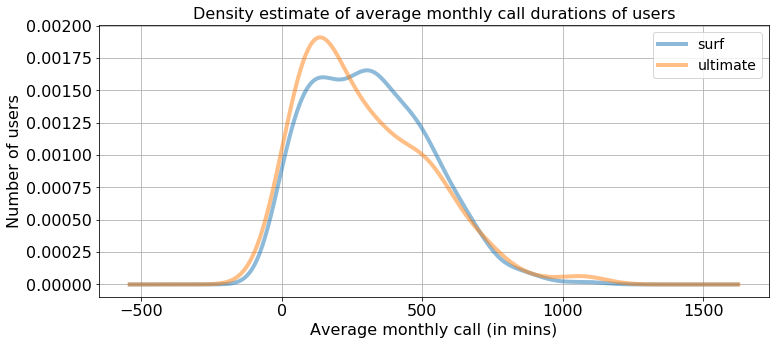

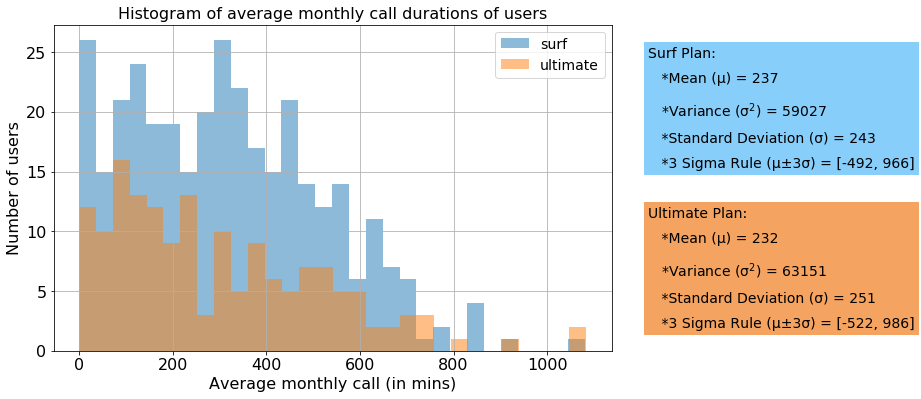

<Figure size 432x288 with 0 Axes>

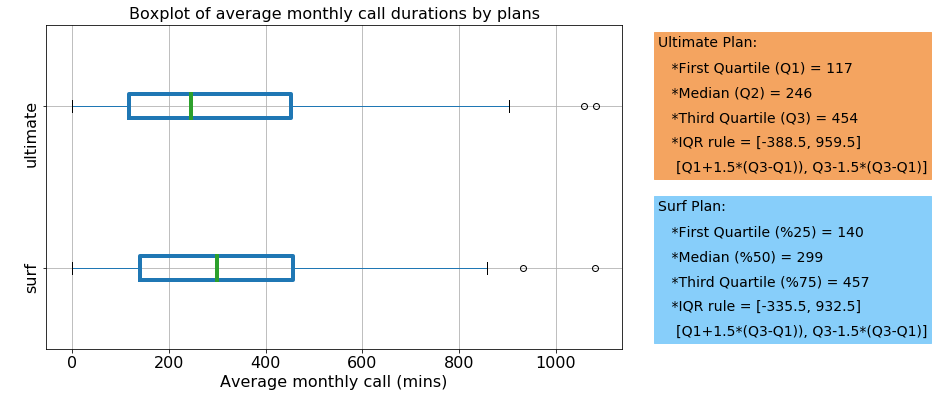


Outliers from call durations data by 3 sigma rule:


,user_id,plan,mins
225,1324,surf,1081.222222
438,1329,ultimate,1059.600000
452,1382,ultimate,1083.285714



Outliers from call durations data by IQR rule:


,user_id,plan,mins
225,1324,surf,1081.222222
438,1329,ultimate,1059.600000
452,1382,ultimate,1083.285714
438,1329,ultimate,1059.600000
452,1382,ultimate,1083.285714


In [25]:
# Plot density estimate, histogram, and box plots for call durations data

plan_usage = m_usage.copy()

e = 'mins'
group = plan_usage.groupby(by='plan').apply(lambda grp: grp.xs(e, level=(1), axis=1).mean(axis=1))
group = group.reset_index(level= 0, drop=True)

# Plot density estimate
plt.figure()
group.groupby(by=['plan']).plot(kind="kde", alpha=0.5, grid=True, figsize=(12,5), lw=4)
plt.title("Density estimate of average monthly call durations of users", fontsize=16)
plt.xlabel("Average monthly call (in mins)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of users", fontsize=16)  
plt.legend(fontsize=14)
plt.show()
print()

# Plot histogram
plt.figure()
group.groupby(by=['plan']).plot(kind="hist", alpha=0.5, bins=30, grid=True, figsize=(10,6))
plt.title("Histogram of average monthly call durations of users", fontsize=16)
plt.xlabel("Average monthly call (in mins)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of users", fontsize=16) 
plt.legend(fontsize=14)
plt.figtext(0.95, 0.55, 
   "Surf Plan:\n   *Mean (\u03BC) = {}\n   *Variance (\u03C3$^2$) = {}\n   *Standard Deviation (\u03C3) = {}\n"
   "   *3 Sigma Rule (\u03BC\u00B13\u03C3) = [{}, {}]"
                     .format(int(plan_stats.iloc[0,0].round(0)), 
                             int(plan_stats.iloc[0,1].round(0)), 
                             int(plan_stats.iloc[0,2].round(0)),
                             int((plan_stats.iloc[0,0] - 3*plan_stats.iloc[0,2]).round(0)),
                             int((plan_stats.iloc[0,0] + 3*plan_stats.iloc[0,2]).round(0))),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')
plt.figtext(0.95, 0.18, 
   "Ultimate Plan:\n   *Mean (\u03BC) = {}\n   *Variance (\u03C3$^2$) = {}\n   *Standard Deviation (\u03C3) = {}\n"
   "   *3 Sigma Rule (\u03BC\u00B13\u03C3) = [{}, {}]"
                     .format(int(plan_stats.iloc[1,0].round(0)), 
                             int(plan_stats.iloc[1,1].round(0)), 
                             int(plan_stats.iloc[1,2].round(0)),
                             int((plan_stats.iloc[1,0] - 3*plan_stats.iloc[1,2]).round(0)),
                             int((plan_stats.iloc[1,0] + 3*plan_stats.iloc[1,2]).round(0))), 
                      linespacing = 2, fontsize=14, backgroundcolor='sandybrown')
# plt.vlines(500, 0, 25, colors= 'lightskyblue')
# plt.vlines(3000, 0, 25, colors= 'sandybrown')

plt.show()
print()

# Plot boxplot
plt.figure()
group_ss = group.groupby(by=['plan']).describe().round(0).astype('int')
group = group.reset_index()
group.columns = ['user_id', 'plan', e]
boxprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)
group.boxplot(column=e, by=['plan'], figsize=(10,6), grid=True, fontsize=16, rot=90, vert=False,
              boxprops=boxprops, medianprops=medianprops,
                return_type='dict')
plt.suptitle('')
plt.ylabel("     ", rotation=0, fontsize=16)
plt.title('Boxplot of average monthly call durations by plans', fontsize=16)
plt.xlabel('Average monthly call (mins)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.figtext(0.95, 0.56, 
   "Ultimate Plan:\n   *First Quartile (Q1) = {}\n   *Median (Q2) = {}\n   *Third Quartile (Q3) = {}\n"
   "   *IQR rule = [{}, {}]\n    [Q1+1.5*(Q3-Q1)), Q3-1.5*(Q3-Q1)]"
     .format(group_ss.loc['ultimate', '25%'], 
             group_ss.loc['ultimate', '50%'], 
             group_ss.loc['ultimate', '75%'],
             group_ss.loc['ultimate', '25%'] - 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%']),
             group_ss.loc['ultimate', '75%'] + 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])),
             linespacing = 2, fontsize=14, backgroundcolor='sandybrown')
plt.figtext(0.95, 0.18, 
   "Surf Plan:\n   *First Quartile (%25) = {}\n   *Median (%50) = {}\n   *Third Quartile (%75) = {}\n"
   "   *IQR rule = [{}, {}]\n    [Q1+1.5*(Q3-Q1)), Q3-1.5*(Q3-Q1)]"
            .format(group_ss.loc['surf', '25%'], 
                    group_ss.loc['surf', '50%'], 
                    group_ss.loc['surf', '75%'],
                    group_ss.loc['surf', '25%'] - 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%']),
                    group_ss.loc['surf', '75%'] + 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')
plt.show()
print()

# Get user ids of outliers from 3 sigma rule
calls_outliers_3sigma = group.loc[(group['plan'] == 'surf') & 
                           (group['mins'] > plan_stats.iloc[0,0] + 3*plan_stats.iloc[0,2])]
calls_outliers_3sigma = calls_outliers_3sigma.append(group.loc[(group['plan'] == 'ultimate') & 
                          (group['mins'] > plan_stats.iloc[1,0] + 3*plan_stats.iloc[1,2])])
print('Outliers from call durations data by 3 sigma rule:')
display(calls_outliers_3sigma)
print()

# Get user ids of outliers from IQR rule
calls_outliers_IQR = group.loc[(group['plan'] == 'surf') & (group['mins'] >
        (group_ss.loc['surf', '75%'] + 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])))]
calls_outliers_IQR = calls_outliers_3sigma.append(group.loc[(group['plan'] == 'ultimate') & (group['mins'] >
        (group_ss.loc['ultimate', '75%'] + 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])))])
print('Outliers from call durations data by IQR rule:')
display(calls_outliers_IQR)


Let us summarize our findings for the average monthly call durations of the customers:
- When we look at the means and standard deviations of the two plans, we see that the values are close to each other. The Surf plan has a slightly larger mean but slightly smaller standard deviation. The median customer in the Surf plan, however, spent about $50$ minutes more than the median customer of the Ultimate plan.
- Although mean and standard deviation values are close to each other, we can see that the density estimates from the two groups differ in various aspects. First of all, while the Ultimate plan seems to have three modes, two modes are observed around the mean of the Surf plan. In addition, the two densities display skews in opposite directions: the Surf plan is slightly skewed to the right and the Ultimate plan to the left.
- The shape of the density estimate of the Ultimate plan resembles  a bit to a lognormal probability density.
- From the boxplot, we see that the Ultimate plan has a slightly larger interquartile range (IQR). Moreover, more outliers are detected by the IQR rule.

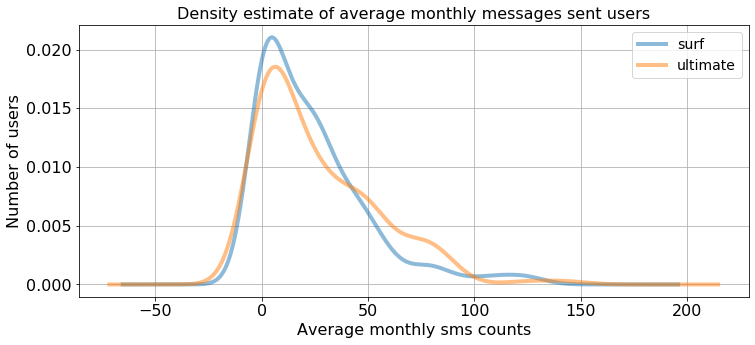

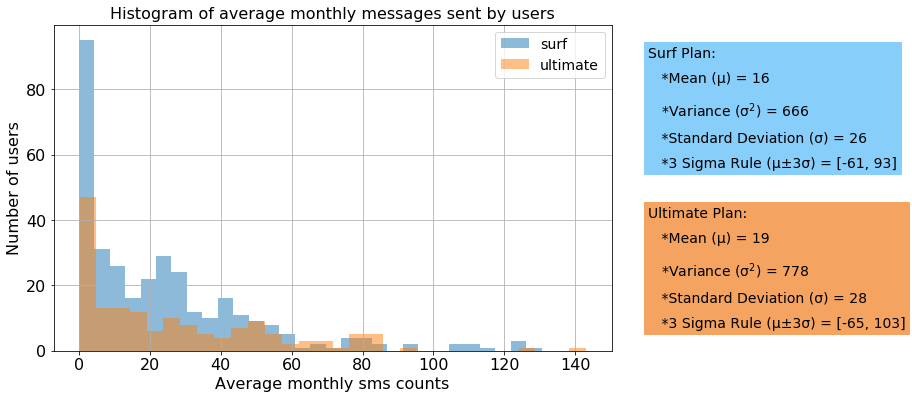

<Figure size 432x288 with 0 Axes>

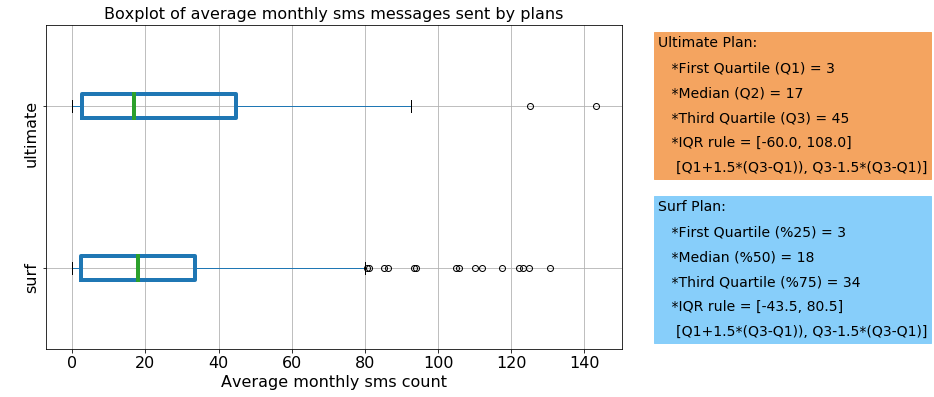

Outliers from sent messages data by 3 sigma rule:


,user_id,plan,sms
49,1076,surf,123.333333
80,1119,surf,122.000000
114,1169,surf,110.000000
173,1254,surf,105.000000
225,1324,surf,130.555556
229,1328,surf,112.090909
233,1335,surf,93.428571
241,1343,surf,105.600000
248,1355,surf,94.000000
268,1381,surf,124.800000



Outliers from sent messages data by IQR rule:


,user_id,plan,sms
49,1076,surf,123.333333
65,1098,surf,85.200000
80,1119,surf,122.000000
114,1169,surf,110.000000
173,1254,surf,105.000000
201,1293,surf,86.400000
225,1324,surf,130.555556
229,1328,surf,112.090909
233,1335,surf,93.428571
241,1343,surf,105.600000


In [26]:
# Plot histogram, density estimate, and box plots for sent messages
e = 'sms'
group = plan_usage.groupby(by='plan').apply(lambda grp: grp.xs(e, level=(1), axis=1).mean(axis=1))
group = group.reset_index(level= 0, drop=True)

# Plot density estimate
plt.figure()
group.groupby(by=['plan']).plot(kind="kde", alpha=0.5, grid=True, figsize=(12,5), lw=4)
plt.title("Density estimate of average monthly messages sent users", fontsize=16)
plt.xlabel("Average monthly sms counts", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of users", fontsize=16)    
plt.legend(fontsize=14)
plt.show()
print()

# Plot histogram
plt.figure()
group.groupby(by=['plan']).plot(kind="hist", alpha=0.5, bins=30, grid=True, figsize=(10,6))
plt.title("Histogram of average monthly messages sent by users", fontsize=16)
plt.xlabel("Average monthly sms counts", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of users", fontsize=16)  
plt.legend(fontsize=14)
plt.figtext(0.95, 0.55, 
   "Surf Plan:\n   *Mean (\u03BC) = {}\n   *Variance (\u03C3$^2$) = {}\n   *Standard Deviation (\u03C3) = {}\n"
   "   *3 Sigma Rule (\u03BC\u00B13\u03C3) = [{}, {}]"
                     .format(int(plan_stats.iloc[0,3].round(0)), 
                             int(plan_stats.iloc[0,4].round(0)), 
                             int(plan_stats.iloc[0,5].round(0)),
                             int((plan_stats.iloc[0,3] - 3*plan_stats.iloc[0,5]).round(0)),
                             int((plan_stats.iloc[0,3] + 3*plan_stats.iloc[0,5]).round(0))),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')
plt.figtext(0.95, 0.18, 
   "Ultimate Plan:\n   *Mean (\u03BC) = {}\n   *Variance (\u03C3$^2$) = {}\n   *Standard Deviation (\u03C3) = {}\n"
   "   *3 Sigma Rule (\u03BC\u00B13\u03C3) = [{}, {}]"
                     .format(int(plan_stats.iloc[1,3].round(0)), 
                             int(plan_stats.iloc[1,4].round(0)), 
                             int(plan_stats.iloc[1,5].round(0)),
                             int((plan_stats.iloc[1,3] - 3*plan_stats.iloc[1,5]).round(0)),
                             int((plan_stats.iloc[1,3] + 3*plan_stats.iloc[1,5]).round(0))), 
                      linespacing = 2, fontsize=14, backgroundcolor='sandybrown')
plt.show()
print()

# Plot boxplot
plt.figure()
group_ss = group.groupby(by=['plan']).describe().round(0).astype('int')
group = group.reset_index()
group.columns = ['user_id', 'plan', e]
boxprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)
group.boxplot(column=e, by=['plan'], figsize=(10,6), grid=True, fontsize=16, rot=90, vert=False,
             boxprops=boxprops, medianprops=medianprops,
                return_type='dict')
plt.suptitle('')
plt.ylabel("     ", rotation=0, fontsize=16)
plt.xlabel("")
plt.title('Boxplot of average monthly sms messages sent by plans', fontsize=16)
plt.xlabel('Average monthly sms count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.figtext(0.95, 0.56, 
   "Ultimate Plan:\n   *First Quartile (Q1) = {}\n   *Median (Q2) = {}\n   *Third Quartile (Q3) = {}\n"
   "   *IQR rule = [{}, {}]\n    [Q1+1.5*(Q3-Q1)), Q3-1.5*(Q3-Q1)]"
     .format(group_ss.loc['ultimate', '25%'], 
             group_ss.loc['ultimate', '50%'], 
             group_ss.loc['ultimate', '75%'],
             group_ss.loc['ultimate', '25%'] - 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%']),
             group_ss.loc['ultimate', '75%'] + 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])),
             linespacing = 2, fontsize=14, backgroundcolor='sandybrown')
plt.figtext(0.95, 0.18, 
   "Surf Plan:\n   *First Quartile (%25) = {}\n   *Median (%50) = {}\n   *Third Quartile (%75) = {}\n"
   "   *IQR rule = [{}, {}]\n    [Q1+1.5*(Q3-Q1)), Q3-1.5*(Q3-Q1)]"
            .format(group_ss.loc['surf', '25%'], 
                    group_ss.loc['surf', '50%'], 
                    group_ss.loc['surf', '75%'],
                    group_ss.loc['surf', '25%'] - 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%']),
                    group_ss.loc['surf', '75%'] + 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')
plt.show()

# Get user ids of outliers from 3 sigma rule
messages_outliers_3sigma = group.loc[(group['plan'] == 'surf') & 
                           (group['sms'] > plan_stats.iloc[0,3] + 3*plan_stats.iloc[0,5])]
messages_outliers_3sigma = messages_outliers_3sigma.append(group.loc[(group['plan'] == 'ultimate') & 
                          (group['sms'] > plan_stats.iloc[1,3] + 3*plan_stats.iloc[1,5])])
print('Outliers from sent messages data by 3 sigma rule:')
display(messages_outliers_3sigma)
print()

# Get user ids of outliers from IQR rule
messages_outliers_IQR = group.loc[(group['plan'] == 'surf') & (group['sms'] >
        (group_ss.loc['surf', '75%'] + 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])))]
messages_outliers_IQR = messages_outliers_IQR.append(group.loc[(group['plan'] == 'ultimate') & (group['sms'] >
        (group_ss.loc['ultimate', '75%'] + 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])))])
print('Outliers from sent messages data by IQR rule:')
display(messages_outliers_IQR)


Let us summarize our findings for the average monthly text messages sent by the customers:
- In this case, the mean, standard deviation, and median statistics of the two plans are close to each other. However, this time, while Ultimate plan has a slightly larger mean and variance. On average between $15$ to $20$ text messages are sent by the customers each month.
- This time both plans seem to have multiple modes, and the skews are in the same directions: both plans are skewed to the right.
- The shapes of both density estimates resembles to lognormal probability densities.
- From the boxplot, we see that the Ultimate plan has a larger interquartile range (IQR) extending towards larger values of the average monthly number of sent message counts, as well as a larger upper whisker value. On the other hand, the Surf plan has many more outliers than the Ultimate plan.

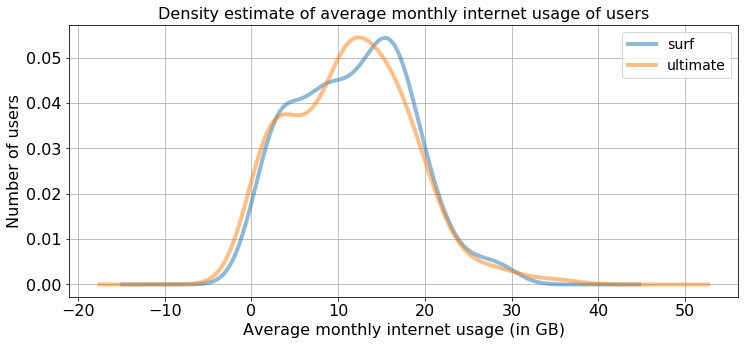

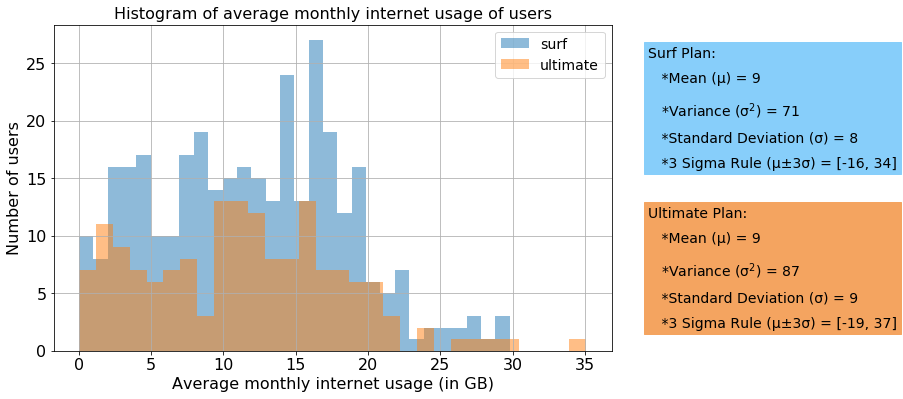

<Figure size 432x288 with 0 Axes>

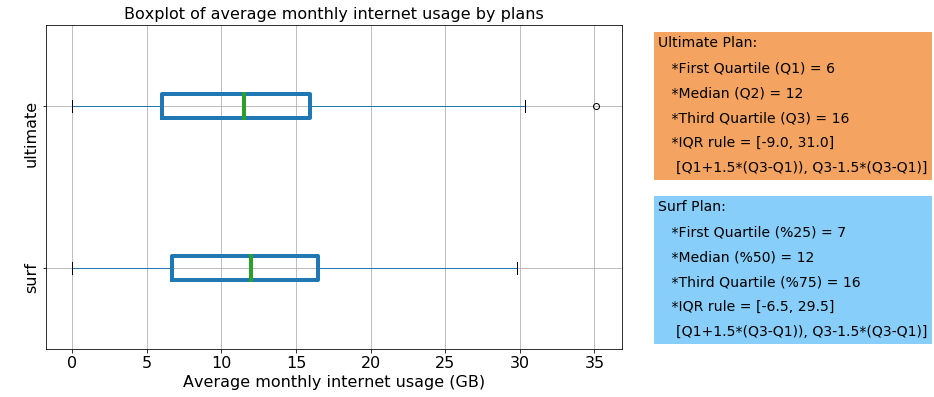

Outliers from internet usage data by 3 sigma rule:


,user_id,plan,gb



Outliers from internet usage data by IQR rule:


,user_id,plan,gb
201,1293,surf,29.800000
346,1028,ultimate,35.090909


In [27]:
# Plot histogram, density estimate, and box plots for internet usage
e = 'gb'
group = plan_usage.groupby(by='plan').apply(lambda grp: grp.xs(e, level=(1), axis=1).mean(axis=1))
group = group.reset_index(level= 0, drop=True)

# Plot density estimate
plt.figure()
group.groupby(by=['plan']).plot(kind="kde", alpha=0.5, grid=True, figsize=(12,5), lw=4)
plt.title("Density estimate of average monthly internet usage of users", fontsize=16)
plt.xlabel("Average monthly internet usage (in GB)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of users", fontsize=16)   
plt.legend(fontsize=14)
plt.show()
print()

# Plot histogram
plt.figure()
group.groupby(by=['plan']).plot(kind="hist", alpha=0.5, bins=30, grid=True, figsize=(10,6))
plt.title("Histogram of average monthly internet usage of users", fontsize=16)
plt.xlabel("Average monthly internet usage (in GB)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of users", fontsize=16)   
plt.legend(fontsize=14)
plt.figtext(0.95, 0.55, 
   "Surf Plan:\n   *Mean (\u03BC) = {}\n   *Variance (\u03C3$^2$) = {}\n   *Standard Deviation (\u03C3) = {}\n"
   "   *3 Sigma Rule (\u03BC\u00B13\u03C3) = [{}, {}]"
                     .format(int(plan_stats.iloc[0,6].round(0)), 
                             int(plan_stats.iloc[0,7].round(0)), 
                             int(plan_stats.iloc[0,8].round(0)),
                             int((plan_stats.iloc[0,6] - 3*plan_stats.iloc[0,8]).round(0)),
                             int((plan_stats.iloc[0,6] + 3*plan_stats.iloc[0,8]).round(0))),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')
plt.figtext(0.95, 0.18, 
   "Ultimate Plan:\n   *Mean (\u03BC) = {}\n   *Variance (\u03C3$^2$) = {}\n   *Standard Deviation (\u03C3) = {}\n"
   "   *3 Sigma Rule (\u03BC\u00B13\u03C3) = [{}, {}]"
                     .format(int(plan_stats.iloc[1,6].round(0)), 
                             int(plan_stats.iloc[1,7].round(0)), 
                             int(plan_stats.iloc[1,8].round(0)),
                             int((plan_stats.iloc[1,6] - 3*plan_stats.iloc[1,8]).round(0)),
                             int((plan_stats.iloc[1,6] + 3*plan_stats.iloc[1,8]).round(0))), 
                      linespacing = 2, fontsize=14, backgroundcolor='sandybrown')
plt.show()
print()

# Plot boxplot
plt.figure()
group_ss = group.groupby(by=['plan']).describe().round(0).astype('int')
group = group.reset_index()
group.columns = ['user_id', 'plan', e]
boxprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)
group.boxplot(column=e, by=['plan'], figsize=(10,6), grid=True, fontsize=16, rot=90, vert=False,
             boxprops=boxprops, medianprops=medianprops,
                return_type='dict')
plt.suptitle('')
plt.ylabel("     ", rotation=0, fontsize=16)
plt.xlabel("")
plt.title('Boxplot of average monthly internet usage by plans', fontsize=16)
plt.xlabel('Average monthly internet usage (GB)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.figtext(0.95, 0.56, 
   "Ultimate Plan:\n   *First Quartile (Q1) = {}\n   *Median (Q2) = {}\n   *Third Quartile (Q3) = {}\n"
   "   *IQR rule = [{}, {}]\n    [Q1+1.5*(Q3-Q1)), Q3-1.5*(Q3-Q1)]"
     .format(group_ss.loc['ultimate', '25%'], 
             group_ss.loc['ultimate', '50%'], 
             group_ss.loc['ultimate', '75%'],
             group_ss.loc['ultimate', '25%'] - 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%']),
             group_ss.loc['ultimate', '75%'] + 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])),
             linespacing = 2, fontsize=14, backgroundcolor='sandybrown')
plt.figtext(0.95, 0.18, 
   "Surf Plan:\n   *First Quartile (%25) = {}\n   *Median (%50) = {}\n   *Third Quartile (%75) = {}\n"
   "   *IQR rule = [{}, {}]\n    [Q1+1.5*(Q3-Q1)), Q3-1.5*(Q3-Q1)]"
            .format(group_ss.loc['surf', '25%'], 
                    group_ss.loc['surf', '50%'], 
                    group_ss.loc['surf', '75%'],
                    group_ss.loc['surf', '25%'] - 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%']),
                    group_ss.loc['surf', '75%'] + 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')
plt.show()

# Get user ids of outliers from 3 sigma rule
internet_outliers_3sigma = group.loc[(group['plan'] == 'surf') & 
                           (group['gb'] > plan_stats.iloc[0,6] + 3*plan_stats.iloc[0,8])]
internet_outliers_3sigma = internet_outliers_3sigma.append(group.loc[(group['plan'] == 'ultimate') & 
                          (group['gb'] > plan_stats.iloc[1,6] + 3*plan_stats.iloc[1,8])])
internet_outliers_3sigma = internet_outliers_3sigma.append(group.loc[(group['plan'] == 'surf') & 
                           (group['gb'] < plan_stats.iloc[0,6] - 3*plan_stats.iloc[0,8])])
internet_outliers_3sigma = internet_outliers_3sigma.append(group.loc[(group['plan'] == 'ultimate') & 
                          (group['gb'] < plan_stats.iloc[1,6] - 3*plan_stats.iloc[1,8])])
print('Outliers from internet usage data by 3 sigma rule:')
display(internet_outliers_3sigma)
print()

# Get user ids of outliers from IQR rule
internet_outliers_IQR = group.loc[(group['plan'] == 'surf') & (group['gb'] >
        (group_ss.loc['surf', '75%'] + 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])))]
internet_outliers_IQR = internet_outliers_IQR.append(group.loc[(group['plan'] == 'ultimate') & (group['gb'] >
        (group_ss.loc['ultimate', '75%'] + 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])))])
internet_outliers_IQR = internet_outliers_IQR.append(group.loc[(group['plan'] == 'surf') & (group['gb'] <
        (group_ss.loc['surf', '25%'] - 1.5*(group_ss.loc['surf', '75%']-group_ss.loc['surf', '25%'])))])
internet_outliers_IQR = internet_outliers_IQR.append(group.loc[(group['plan'] == 'ultimate') & (group['gb'] <
        (group_ss.loc['ultimate', '25%'] - 1.5*(group_ss.loc['ultimate', '75%']-group_ss.loc['ultimate', '25%'])))])
print('Outliers from internet usage data by IQR rule:')
display(internet_outliers_IQR)


Let us summarize our findings for the average monthly internet usage by the customers:
- Here the summary statistics of the two plans are really close to each other with the Ultimate plan having a slightly larger variance. On average customers use $9$ GB of data each month.
- Both plans have multiple modes.
- From the boxplot, we see that both plans have similar interquartile ranges (IQR). Outliers are detected only by the IQR rule.

**Concluding remarks:** In this step, we prepared a usage table aggregating monthly call durations, counts of sent messages, and internet usages for each customer. We carefully rounded up the seconds to minutes for the calls and the aggregated monthly megabytes to gigabytes. Then, we computed the average monthly usages for the customers for each service and plotted the corresponding histograms, density estimates, and boxplots. The visualisations were accompanied with the summary and descriptive statistics we calculated. 

In the next step, we will compute average monthly revenues generated from the users of both plans. Having a quick look to the usage tables, we can see that in most cases the customers exceed the package limits in their data volume consumptions. As the price penalties are clearly much significant for data than calls or texted messages, no doubt the internet usage will be most determinant for the revenues.  

<a class="anchor" id="step4"></a> 
### Step 4. Test the hypotheses

In this step, we test the following two hypotheses:
- **Hypothesis 1:** The average revenue from users of Ultimate and Surf calling plans differs.
- **Hypothesis 2:** The average revenue from users in NY-NJ area is different from that of the users from other regions.

While performing the tests, we decide what alpha value to use. We also explain how we formulated the null and alternative hypotheses and what criterion you used to test the hypotheses and why.

**Choice of testing method and test parameters:** We start by discussing which test we will use to test the hypotheses. Note that in both cases, we will be testing whether the sample means of two customer populations from the plans are equal or differ. In such cases, one of the most commonly used test is the t-test and we will use it here. Luckily, the scipy library has the testing algorithm implemented, so we need not worry about coding that. However, we need to discuss which values to set for two variables. The first one is the critical value alpha which is specified to set the sample significance level of the hypothesis test. Here we will set it to $5\%$. The second one is the 'equal_var' argument of the testing algorithm. If we believe that the samples are taken from populations with similar parameters, we should set the 'equal_var' argument to True. Otherwise, we should set it to False. We will set this argument as follows. For each sample group, we will compute the variance of the average monthly revenues. Then, if these variances do not differ more than $5\%$, we will set the value to True, otherwise if the difference is larger, we will set it to False.

**To remove or not to remove outliers?** As we know, outliers might be the indication of errors in our data or they might be due to the variability in the data. In case of errors, it certainly makes sense to remove them before testing hypothesis. In the datasets of this project, we only observed some minor anomaly in data. We came up to some inconsistency for the churn dates of few customers. Thus in our context, the outliers are most likely to be an indication of the variability in data. Does this mean we should keep them while testing the hypotheses? Not necessarily. In our case, we are interested with the average revenue generated by different groups of customers from two prepaid plans. Now, there could be in each group customers who have a much different behavior pattern from the rest. This could be due to various reasons, maybe a particular month usage was increased because the customer went aborad and dependent on data during the trip. Or, a customer is a sales person using all the time his phone to make calls. Such cases no doubt increase the average revenues generated from the plans, but they might be misleading for business decisions related to adjusting tariffs. What if the few outlier customers churn within few months? We believe that we should test the hypotheses using only customers who fall into the typical pattern of the groups. The outlier customers could always be analyzed separately to adjust business decisions. So, we start by computing the average monthly revenues of typical users in each group by using the typicaş range we found earlier by appliyng the IQR rule. 

In [28]:
# Extract 'user_id' of outlier customers from IQR rule and filter them out 

# Merge outliers data by IQR rulls from calls, messages, internet
outliers_IQR = pd.concat([calls_outliers_IQR, messages_outliers_IQR,
                          internet_outliers_IQR], join='outer').sort_values(by='user_id')
# display(outliers_IQR)
print("Number of outliers by IQR rule for Surf plan:", 
      outliers_IQR.loc[outliers_IQR['plan']=='surf', 'plan'].count())
print("Number of outliers by IQR rule for Ultimate plan:", 
      outliers_IQR.loc[outliers_IQR['plan']=='ultimate', 'plan'].count())

# Filter out outliers from the usage table and store it in a new Dataframe
data_Htest = m_usage[~m_usage.index.get_level_values('user_id').isin(outliers_IQR['user_id'])].copy()
print('Remaning number of customers after outliers by IQR rule are filtered out:', len(data_Htest))
data_Htest.fillna(0, inplace=True)
display(data_Htest.head())


Number of outliers by IQR rule for Surf plan: 16
Number of outliers by IQR rule for Ultimate plan: 7
Remaning number of customers after outliers by IQR rule are filtered out: 481


month               1              2              3              4            \
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb   
user_id plan                                                                   
1000    ultimate  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1001    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1002    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1003    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1004    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

month                 5                6                  7              \
usage              mins  sms   gb   mins   sms    gb   mins   sms    gb   
user_id plan                                                              
1000    ultimate    0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1001    surf        0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1002    surf        0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1003    surf        0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1004    surf      195.0  7.0  7.0  286.0  18.0  21.0  385.0  26.0  24.0   

month                 8                  9                 10              \
usage              mins   sms    gb   mins   sms    gb   mins   sms    gb   
user_id plan                                                                
1000    ultimate    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1001    surf      187.0  30.0   7.0  326.0  44.0  14.0  411.0  53.0  22.0   
1002    surf        0.0   0.0   0.0    0.0   0.0   0.0   62.0  15.0   7.0   
1003    surf        0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1004    surf      361.0  25.0  28.0  311.0  21.0  19.0  379.0  24.0  15.0   

month                11                  12              
usage              mins   sms    gb    mins   sms    gb  
user_id plan                                             
1000    ultimate    0.0   0.0   0.0   124.0  11.0   2.0  
1001    surf      441.0  36.0  19.0   422.0  44.0  19.0  
1002    surf      393.0  32.0  19.0   393.0  41.0  15.0  
1003    surf        0.0   0.0   0.0  1135.0  50.0  27.0  
1004    surf      485.0  25.0  22.0   434.0  31.0  21.0

In [29]:
# Define a function to compute monthly revenues of users from the usage table

def revenue(row):
    
    # print(row)
    user_id = row.name[0]
    user_plan = row.name[1]
    # print('User plan', user_plan)
    # print('User id', user_id)
    
    index  = (m_plans.loc[m_plans['plan_name'] == user_plan]).index[0]

    messages_incl = m_plans.iloc[index]['messages_included']
    minutes_incl = m_plans.iloc[index]['minutes_included']
    mb_incl = m_plans.iloc[index]['mb_per_month_included']

    # display(m_users.loc[m_users['user_id'] == user_id])
    # Get fixed revenue from tarriff
    if (m_users.loc[m_users['user_id'] == user_id, 'churn_month'].isnull().all()):
        subscription_months = 12 - m_users.loc[m_users['user_id'] == user_id, 'reg_month'].iloc[0] + 1
    else:
        subscription_months = (m_users.loc[m_users['user_id'] == user_id, 'churn_month'].iloc[0]
                                      - m_users.loc[m_users['user_id'] == user_id, 'reg_month'].iloc[0] + 1)
    # print('subcribed months:', subscription_months)

    revenue = m_plans.iloc[index]['usd_monthly_pay']*(subscription_months)

    # print('Revenue fixed:', revenue)
    
    # Compute addition revenue from tariff when package limits are exceeded
    for i in range(12):
        call_mins = row.iloc[3*i]
        message_count = row.iloc[3*i+1]
        internet_gb = row.iloc[3*i+2]
        if (message_count > messages_incl):          
            revenue += (message_count - messages_incl) *  m_plans.iloc[index]['usd_per_message']
        if (call_mins > minutes_incl):
            revenue += (call_mins - minutes_incl) *  m_plans.iloc[index]['usd_per_minute']
        if (internet_gb > mb_incl/1024):
            revenue += (internet_gb - mb_incl/1024) * m_plans.iloc[index]['usd_per_gb']
    
    # print('Revenue final:', revenue)

    return revenue

data_Htest['av_monthly_revenue'] = data_Htest.apply(revenue, axis=1)
pd.set_option('display.max_columns', 50)
display(data_Htest.head())


month               1              2              3              4            \
usage            mins  sms   gb mins  sms   gb mins  sms   gb mins  sms   gb   
user_id plan                                                                   
1000    ultimate  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1001    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1002    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1003    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1004    surf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

month                 5                6                  7              \
usage              mins  sms   gb   mins   sms    gb   mins   sms    gb   
user_id plan                                                              
1000    ultimate    0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1001    surf        0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1002    surf        0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1003    surf        0.0  0.0  0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1004    surf      195.0  7.0  7.0  286.0  18.0  21.0  385.0  26.0  24.0   

month                 8                  9                 10              \
usage              mins   sms    gb   mins   sms    gb   mins   sms    gb   
user_id plan                                                                
1000    ultimate    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1001    surf      187.0  30.0   7.0  326.0  44.0  14.0  411.0  53.0  22.0   
1002    surf        0.0   0.0   0.0    0.0   0.0   0.0   62.0  15.0   7.0   
1003    surf        0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
1004    surf      361.0  25.0  28.0  311.0  21.0  19.0  379.0  24.0  15.0   

month                11                  12             av_monthly_revenue  
usage              mins   sms    gb    mins   sms    gb                     
user_id plan                                                                
1000    ultimate    0.0   0.0   0.0   124.0  11.0   2.0              70.00  
1001    surf      441.0  36.0  19.0   422.0  44.0  19.0             250.09  
1002    surf      393.0  32.0  19.0   393.0  41.0  15.0             100.00  
1003    surf        0.0   0.0   0.0  1135.0  50.0  27.0             379.05  
1004    surf      485.0  25.0  22.0   434.0  31.0  21.0             610.00

In [30]:
# Drop columns we don't need anymore
column_names = [str(e) for e in range(1, 13)]
data_Htest = data_Htest.drop(column_names, level= 0, axis = 1) 
data_Htest.columns = data_Htest.columns.droplevel(1)
data_Htest = data_Htest.reset_index()

# Add city column 
data_Htest['city'] = m_users['city']
display(data_Htest.head())


month,user_id,plan,av_monthly_revenue,city
0,1000,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,250.09,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,100.00,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,379.05,"Tulsa, OK MSA"
4,1004,surf,610.00,"Seattle-Tacoma-Bellevue, WA MSA"


We have gathered the data we need to test the hypotheses. So, let us focus on the first one. We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The average revenue from users of Ultimate and Surf calling plans are equal.
- **Alternative Hypothesis:** The average revenue from users of Ultimate and Surf calling plans differ.

In [33]:
# Test Hypothesis 1

# Get Surf plan group
surf_revenues = data_Htest.loc[data_Htest['plan'] == 'surf', 'av_monthly_revenue'].to_numpy()

# Get Ultimate plan group
ultimate_revenues = data_Htest.loc[data_Htest['plan'] == 'ultimate', 'av_monthly_revenue'].to_numpy()

# Check if sample variances differ more than 5%
eq_var = False
pct_c1 = np.abs(np.var(surf_revenues)-np.var(ultimate_revenues)) / np.var(ultimate_revenues)
pct_c2 = np.abs(np.var(surf_revenues)-np.var(ultimate_revenues)) / np.var(surf_revenues)

if pct_c1 <= 0.05 or pct_c2 <= 0.05:
    eq_var = True

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
results = st.ttest_ind(surf_revenues, ultimate_revenues, equal_var=eq_var)

print('Mean value of average monthly revenues from Surf plan sample:', np.mean(surf_revenues))
print('Mean value of average monthly revenues from Ultimate plan sample:', np.mean(ultimate_revenues))

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Mean value of average monthly revenues from Surf plan sample: 319.56532307692305
Mean value of average monthly revenues from Ultimate plan sample: 479.27564102564105
p-value:  5.908982188450269e-10
We reject the null hypothesis


False

We observe that there is a big difference between the average revenues from our samples of the two prepaid plans. Moeover, the p-value tells us that there is about $6$e$^{-8}\%$ probability of randomly getting a difference that size or larger. This probability is practically $0$ and we can reject the null hypothesis to conclude that there is a significant difference between the average revenues generated from the two prepaid plan.

Let us move to the second hypothesis. We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The average revenue from users in NY-NJ area is equal to that of the users from other regions.
- **Alternative Hypothesis:** The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [34]:
# Test Hypothesis 2

# Get NY-NJ region group
NY_NJ_revenues = data_Htest.loc[data_Htest['city'].str.contains("NY-NJ"), 'av_monthly_revenue'].to_numpy()

# Get group from all regions except NY-NJ region
others_revenues = data_Htest.loc[~data_Htest['city'].str.contains("NY-NJ"), 'av_monthly_revenue'].to_numpy()

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis
    
# Check if sample variances differ more than 5%
eq_var = False
pct_c1 = np.abs(np.var(NY_NJ_revenues)-np.var(others_revenues)) / np.var(others_revenues)
pct_c2 = np.abs(np.var(NY_NJ_revenues)-np.var(others_revenues)) / np.var(NY_NJ_revenues)
print(pct_c1, pct_c2)
if pct_c1 <= 0.05 or pct_c2 <= 0.05:
    eq_var = True

# Perform the test
results = st.ttest_ind(NY_NJ_revenues, others_revenues, equal_var=eq_var)

print('Mean value of average monthly revenues from NY-NJ region sample:', np.mean(NY_NJ_revenues))
print('Mean value of average monthly revenues from sample excluing NY-NJ region:', np.mean(others_revenues))

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

0.14198492968548898 0.16548069445148963
Mean value of average monthly revenues from NY-NJ region sample: 395.52486842105264
Mean value of average monthly revenues from sample excluing NY-NJ region: 366.8292345679012
p-value:  0.3968963411729515
We can't reject the null hypothesis


False

We observe that although the average monthly revenues differ between the NY-NJ region and all the other regions, the p-value tells us that there is about $40\%$ probability of randomly getting a difference that size or larger. Given this probability, we can't reject the null hypothesis. So, we cannnot conclude that the average revenues generated from the NY-NJ region significantly differ from the average revenues generated from the other regions.

### Step 5. Write an overall conclusion

In this report, we analyzed Megaline's data on 500 customers of the prepaid plans Surf and Ultimate. The data was collected over a period of one year in 2018 and consisted of several datasets storing the user information, service usage data for calls, sent messages, and megabytes used, as well as tariff data for the plans. Our main goal was to identify which of these prepaid plans generate more revenue. 

As usual, in Step 1 and Step 2 of the project, we checked the dataset information and content to identify what needs to be preprocessed for the data to be ready for analysis. Overall, the quality of raw data was good with no missing information. We needed to convert some datatypes to facilitate accessing information in our code, in particular dates data and service identifiers that were stored as strings in raw data. In addition, we corrected some of the faulty dates observed in the churn dates of few customers. 

In Step 3, we prepared a usage table for aggregating the consumer's monthly usage in accordance to the tariff rules. Then, we described the consumer's behavior in terms of their average monthly call durations, message counts, and internet usage. We also computed and discussed the corresponding group summary and descriptive statistics, and identified the outliers both based on the $3$ sigma rule and the IQR rule. and Even without calculating the average monthly revenues of the customers, we could tell by the end of Step 3 that the average monthly revenues of both plans will be dominated by the internet usage behavior of the customers. 

In Step 4, before we could test the hypothesis, we needed to choose the appropriate test and testing parameters, formulate the null and alternative hypothesis. We decided to perform t-tests with the $5\%$ critical significance level. Then, we removed the outliers using the IQR rule to be on the safe side as this contained more outlier data points. We argued that the advertising for the outlier customers would need separate analysis, and our analysis here should focus on the customers within the typical usage behavior pattern of each plan. Once the outliers were removed and we aggregated the average monthly revenues of the customers using the usage table we built in Step 3, we proceeded by testing the two hypotheses. The result of the first test indicated that we can assume that the average monthly revenues of customers from the two plans are significantly different.As for the second hypothesis we tested, we did not find enough evidence to conlcude that the average monthly revenues generated from NY-NJ region customers were significantly different than the ones generated from the other regions.  

**Recommendations for the marketing department:** To conclude, we do recommend the marketing department to allocate more budget for advertising to the Ultimate plan. On the other hand, we did not dicover evidence to support a recommendation for the marketing department to specifically target more the NY-NJ regions over the others. 